<div style="
    background: linear-gradient(135deg, #ffffff, #F1F8E9, #E8F5E9);
    border: 2px solid #4CAF50;
    border-radius: 16px;
    padding: 25px;
    box-shadow: 0 0 25px rgba(76, 175, 80, 0.4);
    font-family: 'Segoe UI', sans-serif;
    color: #212121;
    line-height: 1.7;
">

<h1 style="
    text-align: center;
    color: #388E3C;
    font-size: 32px;
    text-shadow: 0 0 5px #cccccc;
">🌿 House Plant Species Classification 📸</h1>

<p style="text-align:center; font-size:14px; color:#4CAF50; margin-top:-5px;">
Computer Vision & Deep Learning | EfficientNet (B0 vs V2B3)
</p>

<p style="font-size:17px; text-align:justify; color:#212121;">
This project builds a <b style="color:#388E3C;">Computer Vision model</b>
to classify <b style="color:#4CAF50;">47 different species of house plants</b>.
Using <b style="color:#388E3C;">Transfer Learning</b> with Keras, this notebook
compares two powerful architectures: <b style="color:#4CAF50;">EfficientNetB0</b>
(as a baseline) and the more advanced <b style="color:#4CAF50;">EfficientNetV2B3</b>.
</p>

<p style="font-size:16px; text-align:justify; color:#424242;">
<b>Motivation:</b> This notebook is a complete guide to a CV classification task. It
demonstrates the full pipeline: from <b style="color:#388E3C;">EDA</b> and
<b style="color:#4CAF50;">Data Augmentation</b> (using `ImageDataGenerator`)
to <b style="color:#388E3C;">handling data imbalance</b>
(using `class_weight`) and finally, comparing model performance.
</p>

<h3 style="color:#388E3C;">🔬 Experiment Overview:</h3>

<ul style="font-size:16px; margin-left:25px; color:#212121;">
    <li>🖼️ <b>EDA:</b> Using <code>Seaborn</code> to visualize class imbalance.</li>
    <li>🔄 <b>Data Preprocessing:</b> Splitting data and using <code>ImageDataGenerator</code> for augmentation.</li>
    <li>⚖️ <b>Imbalance Handling:</b> Calculating <code>class_weight</code> to help minority classes.</li>
    <li>🤖 <b>Model 1 (Baseline):</b> Training a frozen <b>EfficientNetB0</b>.</li>
    <li>🚀 <b>Model 2 (Challenger):</b> Training a larger <b>EfficientNetV2B3</b>.</li>
</ul>

<p style="font-size:16px; text-align:center; color:#388E3C; font-weight:bold; margin-top: 15px;">
If you found this model comparison helpful, please consider leaving an upvote! 👍
</p>

</div>

# 2. Data Loading and Setup

In this step, we perform the following:
1.  **Load Dataset:** We use `kagglehub` to download the dataset.
2.  **Create DataFrame:** We iterate through all sub-folders (where each folder represents a plant species) and gather all image paths along with their corresponding labels into a single `pandas.DataFrame`. This DataFrame will be the single source of truth for all subsequent steps.

In [1]:
import kagglehub
house_plant_species_path = kagglehub.dataset_download('kacpergregorowicz/house-plant-species')

print('Data source import complete.')


Data source import complete.


In [2]:
import os
import pandas as pd

diree = os.path.join(house_plant_species_path, 'house_plant_species')
print(diree)

/kaggle/input/house-plant-species/house_plant_species


In [3]:
os.listdir(diree)

['Orchid',
 'Chrysanthemum',
 'Venus Flytrap',
 'Poinsettia (Euphorbia pulcherrima)',
 'Aloe Vera',
 'Areca Palm (Dypsis lutescens)',
 'Snake plant (Sanseviera)',
 'Elephant Ear (Alocasia spp.)',
 'Boston Fern (Nephrolepis exaltata)',
 'Bird of Paradise (Strelitzia reginae)',
 'Hyacinth (Hyacinthus orientalis)',
 'Sago Palm (Cycas revoluta)',
 'Cast Iron Plant (Aspidistra elatior)',
 'Chinese evergreen (Aglaonema)',
 'Dracaena',
 'Daffodils (Narcissus spp.)',
 'Parlor Palm (Chamaedorea elegans)',
 'Lily of the valley (Convallaria majalis)',
 'Peace lily',
 'Prayer Plant (Maranta leuconeura)',
 'Asparagus Fern (Asparagus setaceus)',
 'Calathea',
 'Dumb Cane (Dieffenbachia spp.)',
 'Monstera Deliciosa (Monstera deliciosa)',
 'Ponytail Palm (Beaucarnea recurvata)',
 'Birds Nest Fern (Asplenium nidus)',
 'Lilium (Hemerocallis)',
 'Rattlesnake Plant (Calathea lancifolia)',
 'Yucca',
 'Money Tree (Pachira aquatica)',
 'Begonia (Begonia spp.)',
 'Ctenanthe',
 'ZZ Plant (Zamioculcas zamiifolia

In [4]:
plant_images = []
labels = []

for foldr in os.listdir(diree):
  for filee in os.listdir(os.path.join(diree, foldr)):
    plant_images.append(os.path.join(diree, foldr, filee))
    labels.append(foldr)

In [5]:
all_df = pd.DataFrame(
    {
        "Plant Image": plant_images,
        "Species": labels
    }
)

# 3. Exploratory Data Analysis (EDA)

In [6]:
all_df

,Plant Image,Species
0,/kaggle/input/house-plant-species/house_plant_...,Orchid
1,/kaggle/input/house-plant-species/house_plant_...,Orchid
2,/kaggle/input/house-plant-species/house_plant_...,Orchid
3,/kaggle/input/house-plant-species/house_plant_...,Orchid
4,/kaggle/input/house-plant-species/house_plant_...,Orchid
...,...,...
14785,/kaggle/input/house-plant-species/house_plant_...,English Ivy (Hedera helix)
14786,/kaggle/input/house-plant-species/house_plant_...,English Ivy (Hedera helix)
14787,/kaggle/input/house-plant-species/house_plant_...,English Ivy (Hedera helix)
14788,/kaggle/input/house-plant-species/house_plant_...,English Ivy (Hedera helix)


In [6]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14790 entries, 0 to 14789
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Plant Image  14790 non-null  object
 1   Species      14790 non-null  object
dtypes: object(2)
memory usage: 231.2+ KB


### 3.1. Class Distribution
We will plot a bar chart showing the number of images available for each plant species. This will reveal if our dataset is **balanced** or **imbalanced**.

**(Observation):** The plot clearly shows a significant disparity in the number of images per class. This is a classic **imbalanced dataset**, which we will need to address later to prevent the model from being biased towards the majority classes.

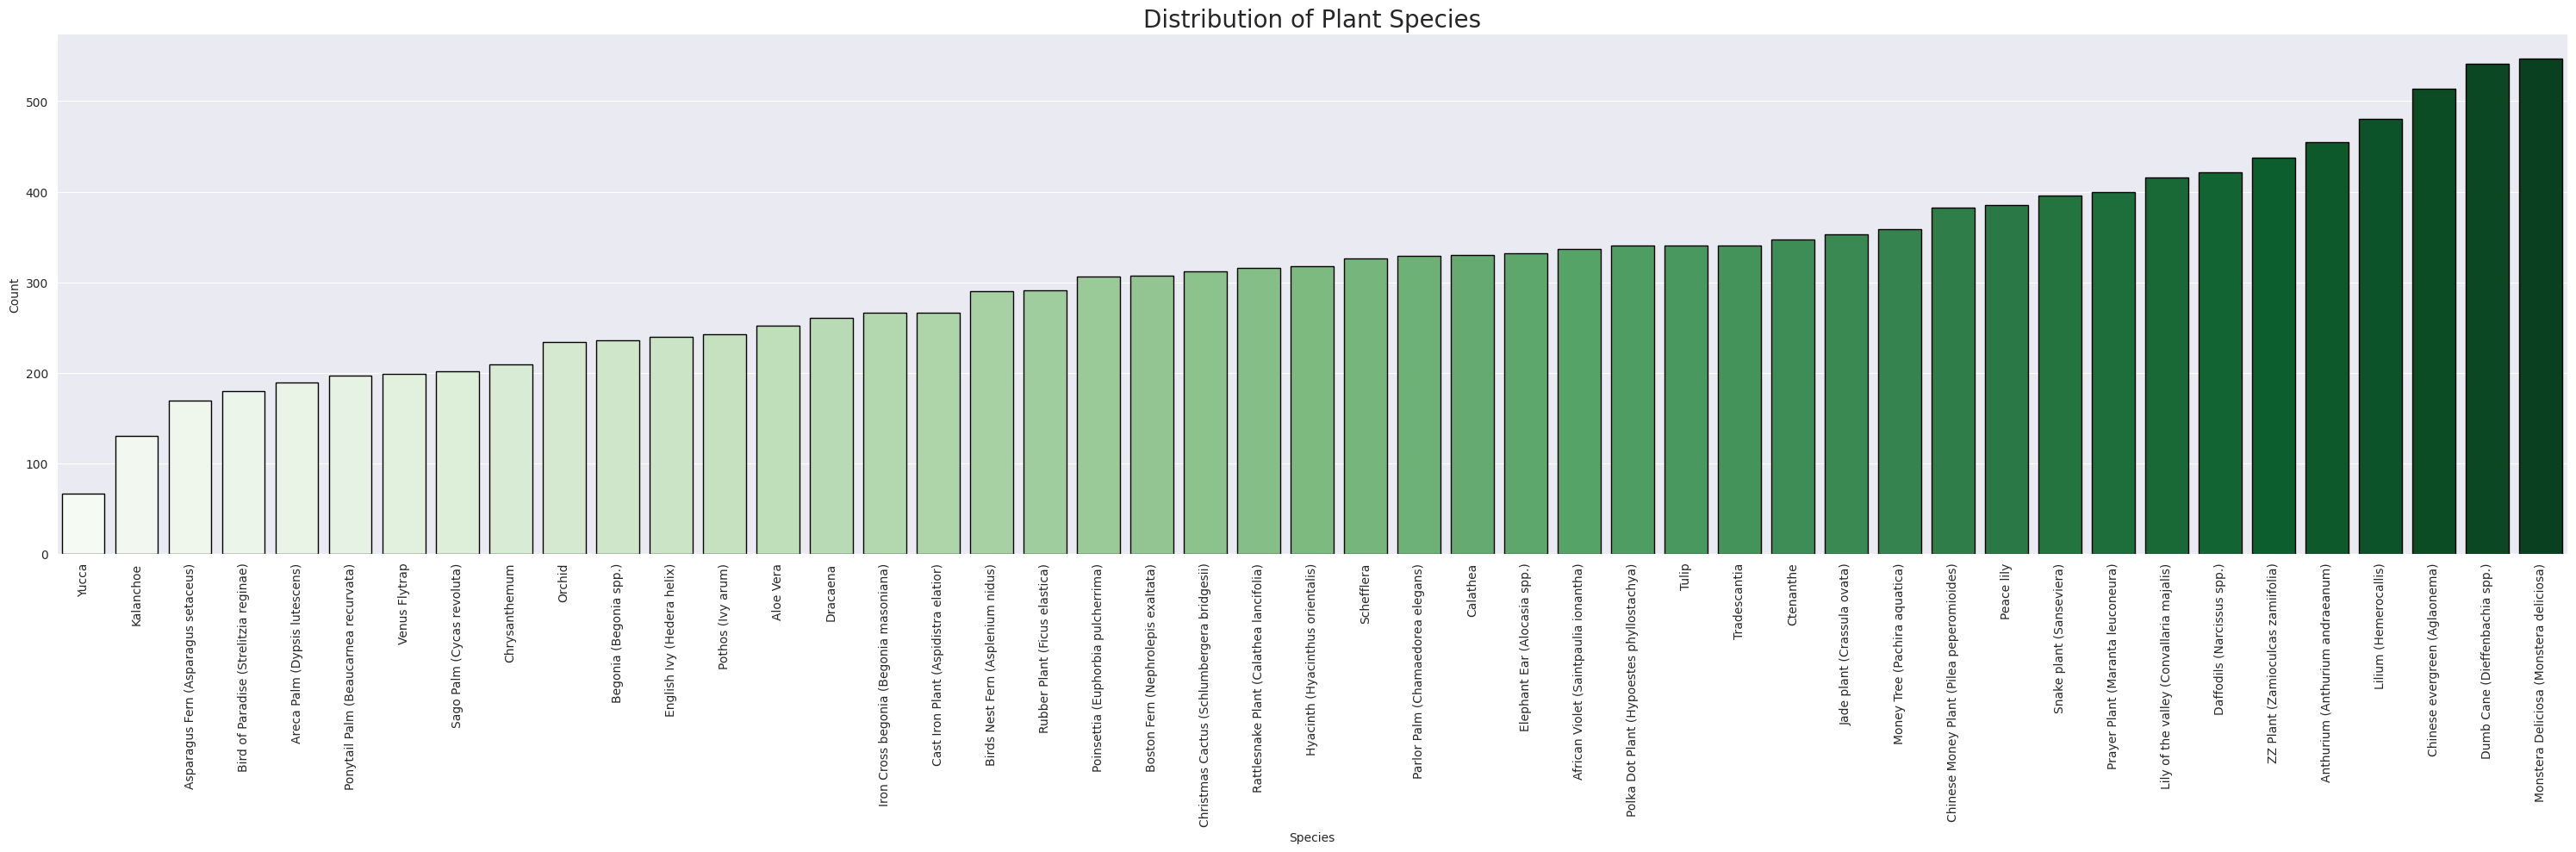

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculating the order of species based on their counts and reverse for least to highest
species_counts = all_df['Species'].value_counts()
species_order = species_counts.index[::-1] # Reversing the index for ascending order

plt.figure(figsize=(30, 10))
sns.countplot(x='Species', data=all_df, palette='Greens', order=species_order, edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel('Species') 
plt.ylabel('Count') 
plt.title('Distribution of Plant Species').set_fontsize(20)
sns.set_style('darkgrid')
plt.tight_layout()
plt.show()

### 3.2. Visualizing Image Samples
We will display one random sample image from each class. This allows us to visually inspect the classes, data quality and understand potential challenges (e.g., variations in lighting, background clutter, and camera angles).

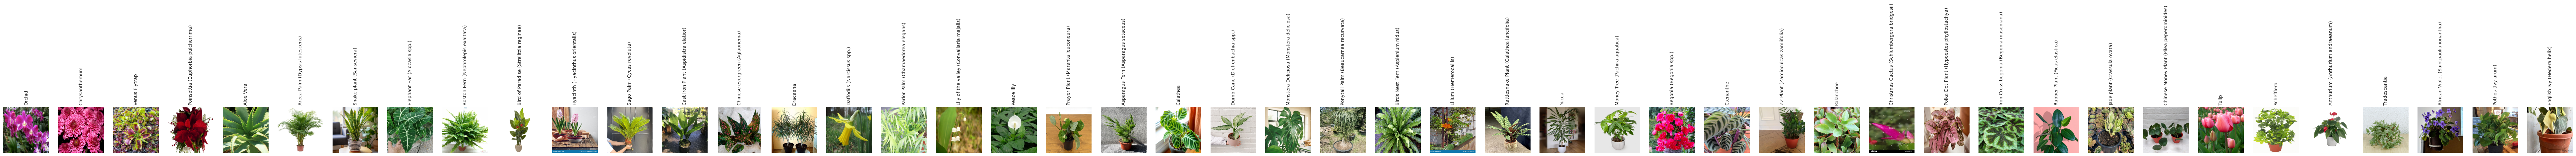

In [11]:
import cv2
import matplotlib.pyplot as plt
import os
import pandas as pd

plt.figure(figsize=(100, 30))
for i, label in enumerate(all_df['Species'].unique()):
    sample = all_df[all_df['Species'] == label].sample(1).iloc[0]
    img_path = sample['Plant Image']

    if not os.path.exists(img_path):
        print(f"Warning: Image file not found at {img_path}")
        continue 

    img = cv2.imread(img_path)

    if img is None:
        print(f"Warning: Could not load image from {img_path}")
        continue

    img = cv2.resize(img, (224, 224))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(1, len(all_df['Species'].unique()), i+1)
    plt.imshow(img)
    title_obj = plt.title(label)
    title_obj.set_fontsize(10)
    title_obj.set_rotation(90)
    plt.axis('off')
plt.show()

# 4. Data Preprocessing and Splitting

### 4.1. Train-Test Split
We split our main DataFrame into two sets:
* **Training Set (80%)**
* **Test Set (20%)**

**Crucially:** We use `stratify=all_df['Species']` to ensure that the proportion of each plant species in the train and test sets is identical to the original dataset. This is essential for a reliable evaluation, especially given our imbalanced data.

### 4.2. Image Data Generators
We use Keras's `ImageDataGenerator` to load images from the DataFrame and feed them to the model in batches:

* **Training Generator (`train_data`):**
    * We apply **Data Augmentation** (e.g., rotation, zoom, horizontal flips).
    * This artificially increases the diversity of our training data and helps prevent overfitting.

* **Test Generator (`test_data`):**
    * We **do not** apply any augmentation here.
    * We set `shuffle=False` to ensure the model is evaluated on the data in a fixed order, which is critical for generating classification reports or confusion matrices later.

In [11]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(all_df, test_size=0.2, random_state=42, stratify=all_df['Species'])

In [12]:
# Import the ImageDataGenerator class from Keras and give it a nickname 'Geni'
from tensorflow.keras.preprocessing.image import ImageDataGenerator as Geni

# 1. Create the "Augmentation Rules" object (the "Recipe Book")
# This object ('train_gen') doesn't hold any images.
# It only defines the *rules* for how to randomly change images when we load them.
train_gen = Geni(
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    shear_range=0.2
)

# 2. Create the "Data Generator" (the "Kitchen")
# This is the actual generator that will feed data to the model.
# It connects the "rules" (train_gen) with the "data location" (train_df and diree).
train_data = train_gen.flow_from_dataframe(
    dataframe=train_df,      # The pandas DataFrame containing the list of filenames and labels
    directory=diree,         # The main folder where all the actual images are stored
    x_col='Plant Image',     # The name of the column in 'train_df' that has the image filenames
    y_col='Species',         # The name of the column in 'train_df' that has the target labels
    target_size=(224, 224),  # Resize all images to this standard size (224x224 pixels)
    color_mode='rgb',        # Read images in 3-channel color (Red, Green, Blue)
    class_mode='categorical',   # Type of problem: 'categorical' (for multi-class classification). This will automatically one-hot encode the 'y_col' labels.
    batch_size=32            # How many images to prepare and feed to the model at one time. The generator will create batches of 16 images.
)

Found 11691 validated image filenames belonging to 47 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 141 invalid image filename(s) in x_col="Plant Image". These filename(s) will be ignored.
  warnings.warn(


In [13]:
test_gen = Geni()

test_data = test_gen.flow_from_dataframe(
    dataframe=test_df,
    directory=diree,
    x_col='Plant Image',
    y_col='Species',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 2929 validated image filenames belonging to 47 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 29 invalid image filename(s) in x_col="Plant Image". These filename(s) will be ignored.
  warnings.warn(


# 5. Handling Class Imbalance

As identified during our EDA, the dataset is imbalanced. We will address this by calculating **Class Weights** using `sklearn.utils.class_weight`.

This technique will assign a higher weight (i.e., a larger loss penalty) to misclassifications from the minority classes (species with fewer images). We will pass this `class_weight_dict` to the model during the `.fit()` process.

In [14]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weight_dict = dict(enumerate(compute_class_weight('balanced', classes=np.unique(train_data.classes), y=train_data.classes)))

In [15]:
classes = train_data.class_indices
num_classes = len(classes)
classes, num_classes

({'African Violet (Saintpaulia ionantha)': 0,
  'Aloe Vera': 1,
  'Anthurium (Anthurium andraeanum)': 2,
  'Areca Palm (Dypsis lutescens)': 3,
  'Asparagus Fern (Asparagus setaceus)': 4,
  'Begonia (Begonia spp.)': 5,
  'Bird of Paradise (Strelitzia reginae)': 6,
  'Birds Nest Fern (Asplenium nidus)': 7,
  'Boston Fern (Nephrolepis exaltata)': 8,
  'Calathea': 9,
  'Cast Iron Plant (Aspidistra elatior)': 10,
  'Chinese Money Plant (Pilea peperomioides)': 11,
  'Chinese evergreen (Aglaonema)': 12,
  'Christmas Cactus (Schlumbergera bridgesii)': 13,
  'Chrysanthemum': 14,
  'Ctenanthe': 15,
  'Daffodils (Narcissus spp.)': 16,
  'Dracaena': 17,
  'Dumb Cane (Dieffenbachia spp.)': 18,
  'Elephant Ear (Alocasia spp.)': 19,
  'English Ivy (Hedera helix)': 20,
  'Hyacinth (Hyacinthus orientalis)': 21,
  'Iron Cross begonia (Begonia masoniana)': 22,
  'Jade plant (Crassula ovata)': 23,
  'Kalanchoe': 24,
  'Lilium (Hemerocallis)': 25,
  'Lily of the valley (Convallaria majalis)': 26,
  'Money 

# 6. Experiment 1: The EfficientNetB0 Model

We will begin with our baseline model, `EfficientNetB0`.

### 6.1. Model Architecture (Transfer Learning)
1.  **Load Base Model:** We load `EfficientNetB0` pre-trained on `imagenet`, setting `include_top=False` to remove its original classification layer.
2.  **Freeze Layers:** We freeze the layers of the base model to make them non-trainable. We want to use the features they have already learned, not retrain them from scratch.
3.  **Add Custom Head:** We stack a `GlobalAveragePooling2D` layer followed by our own `Dense` layers (with `Dropout` for regularization) on top of the base model.
4.  **Output Layer:** The final layer is a `Dense` layer with `num_classes` units and a `softmax` activation function for multi-class classification.

### 6.2. Model Training
We compile the model using the `Adam` optimizer and `categorical_crossentropy` loss. We also use an `EarlyStopping` callback to monitor the `val_loss`, stopping the training when the model ceases to improve and restoring the best weights.

In [16]:
import tensorflow.keras.applications as ap
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout

processing = ap.EfficientNetB0(weights='imagenet', include_top=False)

for layer in processing.layers[:5]:
    layer.trainable = False

ModelB = Sequential(
  [
      processing,
      GlobalAveragePooling2D(),
      Dense(128, activation='relu'),
      Dropout(0.2),
      Dense(64, activation='relu'),
      Dropout(0.2),

      Dense(num_classes, activation='softmax')
  ]
)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [17]:
ModelB.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, None, None,     │     4,049,571 │
│                                 │ 1280)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 47)             │         3,055 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,224,850 (16.12 MB)

 Trainable params: 4,182,827 (15.96 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [18]:
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.callbacks as cb

ModelB.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
call_backy = cb.EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

ModelB.fit(
    train_data,
    epochs=3,
    validation_data=test_data,
    callbacks=[call_backy],
    class_weight=class_weight_dict
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
  8/366 ━━━━━━━━━━━━━━━━━━━━ 7:00 1s/step - accuracy: 0.0115 - loss: 4.0853

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


366/366 ━━━━━━━━━━━━━━━━━━━━ 716s 2s/step - accuracy: 0.0184 - loss: 3.9070 - val_accuracy: 0.0355 - val_loss: 3.8650
Epoch 2/3
366/366 ━━━━━━━━━━━━━━━━━━━━ 459s 1s/step - accuracy: 0.0303 - loss: 3.8424 - val_accuracy: 0.0140 - val_loss: 3.8532
Epoch 3/3
366/366 ━━━━━━━━━━━━━━━━━━━━ 462s 1s/step - accuracy: 0.0201 - loss: 3.8703 - val_accuracy: 0.0225 - val_loss: 3.8516


In [20]:
ModelB.evaluate(test_data)

92/92 ━━━━━━━━━━━━━━━━━━━━ 70s 756ms/step - accuracy: 0.0178 - loss: 3.8516


[3.851597547531128, 0.022533288225531578]

# 7. Experiment 2: The EfficientNetV2B3 Model (Comparison)

Now, we will build a more powerful, modern model to see if it can achieve higher accuracy.

### 7.1. Model Architecture
We follow the same transfer learning steps, but this time using `EfficientNetV2B3`.
* This model is larger (`B3` vs. `B0`) and from the second generation (`V2`).
* We hypothesize it may be able to capture more complex and subtle features from the images.
* We will again freeze the base layers and add a similar custom head.

### 7.2. Model Training
We train the model using the same procedure and data as Experiment 1. This ensures a fair comparison between the two architectures.

In [ ]:
processing = ap.EfficientNetV2B3(weights='imagenet', include_top=False)

for layer in processing.layers[:10]:
    layer.trainable = False

ModelBV2 = Sequential(
  [
      processing,
      GlobalAveragePooling2D(),
      Dense(256, activation='relu'),
      Dropout(0.5),
      Dense(128, activation='relu'),
      Dropout(0.2),
      Dense(num_classes, activation='softmax')
  ]
)

In [22]:
ModelBV2.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
ModelBV2.fit(
    train_data,
    epochs=5,
    validation_data=test_data,
    callbacks=[call_backy],
    class_weight=class_weight_dict
)

Epoch 1/5
366/366 ━━━━━━━━━━━━━━━━━━━━ 723s 2s/step - accuracy: 0.2781 - loss: 2.8502 - val_accuracy: 0.6504 - val_loss: 1.3239
Epoch 2/5
366/366 ━━━━━━━━━━━━━━━━━━━━ 491s 1s/step - accuracy: 0.6294 - loss: 1.3975 - val_accuracy: 0.7771 - val_loss: 0.8601
Epoch 3/5
366/366 ━━━━━━━━━━━━━━━━━━━━ 494s 1s/step - accuracy: 0.7450 - loss: 0.9445 - val_accuracy: 0.7450 - val_loss: 1.0262
Epoch 4/5
366/366 ━━━━━━━━━━━━━━━━━━━━ 475s 1s/step - accuracy: 0.7657 - loss: 0.8395 - val_accuracy: 0.8064 - val_loss: 0.8144
Epoch 5/5
366/366 ━━━━━━━━━━━━━━━━━━━━ 476s 1s/step - accuracy: 0.7980 - loss: 0.7158 - val_accuracy: 0.7992 - val_loss: 0.7951


In [24]:
ModelBV2.evaluate(test_data)

92/92 ━━━━━━━━━━━━━━━━━━━━ 72s 778ms/step - accuracy: 0.8017 - loss: 0.7792


[0.7950584292411804, 0.7992488741874695]

# 8. Final Evaluation and Comparison

After training both models, we perform a final evaluation on the `test_data`, which the models have never seen before.

| Model  |       Test Accuracy |
| :--- | :--- |
| **EfficientNetB0**   |  0.0178 |
| **EfficientNetV2B3** | 0.8017  |

### Conclusion
EfficientNetV2B3 is a winner :)